### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
diamonds = pd.read_csv("Data/diamond.csv")

In [3]:
features = []
def get_column_names(column_names):
    for col in column_names:
        features.append(col)

In [4]:
get_column_names(diamonds.columns)
features

['Carat Weight',
 'Cut',
 'Color',
 'Clarity',
 'Polish',
 'Symmetry',
 'Report',
 'Price']


### Data cleaning

In [5]:
diamonds.shape

(6000, 8)

In [6]:
# Check if the dataset has null values
diamonds.isnull().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [7]:
# Check if the dataset has duplicate values
diamonds_duplicate = diamonds[diamonds.duplicated()]
diamonds_duplicate.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
1141,1.01,Good,D,SI1,VG,VG,GIA,5541
1423,1.20,Signature-Ideal,G,VVS2,ID,ID,AGSL,11530
1507,2.05,Ideal,G,VS1,EX,EX,GIA,28519
1525,0.90,Very Good,G,SI1,EX,VG,GIA,3752
1539,0.90,Very Good,D,SI1,VG,G,GIA,4537


In [8]:
diamonds = diamonds.drop_duplicates()

In [9]:
diamonds.shape

(5917, 8)

In [10]:
# Create a copy of the dataset
diamonds_copy = diamonds
diamonds_copy.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


### Exploratory Data Analysis

In [11]:
# Unique values in eaach column
diamonds.nunique()

Carat Weight     196
Cut                5
Color              6
Clarity            7
Polish             4
Symmetry           4
Report             2
Price           4821
dtype: int64

In [12]:
# Descriptive analysis for cut column
diamonds.groupby('Cut').describe()

Carat Weight                                                \
                       count      mean       std   min   25%   50%     75%   
Cut                                                                          
Fair                   128.0  1.059141  0.275778  0.75  0.90  1.00  1.0100   
Good                   702.0  1.269900  0.444383  0.75  1.00  1.01  1.5100   
Ideal                 2445.0  1.382937  0.490399  0.75  1.02  1.20  1.7000   
Signature-Ideal        240.0  1.212917  0.346793  0.75  1.04  1.12  1.2725   
Very Good             2402.0  1.333751  0.481890  0.75  1.00  1.11  1.6200   

                        Price                                               \
                  max   count          mean           std     min      25%   
Cut                                                                          
Fair             2.02   128.0   5894.890625   4122.630303  2594.0  4035.50   
Good             2.91   702.0   9353.219373   7477.751193  2184.0  4574.25   
Ideal            2.82  2445.0  13156.162372  11085.527193  2383.0  5835.00   
Signature-Ideal  2.39   240.0  11758.779167   9854.502877  2793.0  7054.25   
Very Good        2.80  2402.0  11493.209409   9954.870550  2348.0  4991.25   

                                             
                    50%       75%       max  
Cut                                          
Fair             4628.5   5697.50   29368.0  
Good             5929.5  11571.25   52570.0  
Ideal            9188.0  17045.00  101561.0  
Signature-Ideal  9502.0  13061.50   81399.0  
Very Good        7220.5  15348.25   93813.0

In [13]:
# Descriptive analysis for color column
diamonds.groupby('Color').describe()

Carat Weight                                                     Price  \
             count      mean       std   min   25%   50%   75%   max   count   
Color                                                                          
D            654.0  1.267370  0.470542  0.75  0.92  1.04  1.51  2.81   654.0   
E            773.0  1.226417  0.455863  0.75  0.91  1.02  1.46  2.80   773.0   
F           1002.0  1.306347  0.467687  0.75  1.00  1.09  1.54  2.79  1002.0   
G           1472.0  1.367113  0.476744  0.75  1.01  1.17  1.72  2.78  1472.0   
H           1064.0  1.383816  0.490293  0.75  1.01  1.20  2.00  2.82  1064.0   
I            952.0  1.399664  0.469102  0.75  1.01  1.24  1.67  2.91   952.0   

                                                                                
               mean           std     min      25%     50%       75%       max  
Color                                                                           
D      15353.567278  16748.382053  2945.0  5388.50  7642.5  16827.25  101561.0  
E      11578.595084  10942.713912  2548.0  4844.00  7088.0  12642.00   67240.0  
F      12661.276447  10468.418425  2648.0  5266.50  8830.0  16274.75   60188.0  
G      12539.838315   9068.015509  2579.0  6102.25  8821.0  17323.00   46861.0  
H      10523.245301   7447.072043  2396.0  4873.25  7177.0  15831.75   36709.0  
I       9015.397059   5805.218788  2184.0  4602.00  6667.5  12030.25   31254.0

In [14]:
# Descriptive analysis for clarity column
diamonds.groupby('Clarity').describe()

Carat Weight                                                        \
               count      mean       std   min    25%    50%     75%   max   
Clarity                                                                      
FL               4.0  1.967500  0.506713  1.56  1.605  1.825  2.1875  2.66   
IF             219.0  1.442922  0.499170  0.76  1.030  1.250  2.0000  2.79   
SI1           2022.0  1.246998  0.444438  0.75  0.920  1.040  1.5100  2.91   
VS1           1172.0  1.412184  0.491198  0.75  1.020  1.220  2.0100  2.82   
VS2           1559.0  1.379128  0.497892  0.75  1.010  1.160  2.0000  2.79   
VVS1           282.0  1.364894  0.468453  0.75  1.030  1.210  1.5800  2.66   
VVS2           659.0  1.316768  0.442872  0.75  1.010  1.180  1.5100  2.79   

          Price                                                          \
          count          mean           std      min       25%      50%   
Clarity                                                                   
FL          4.0  63776.000000  29960.681490  33868.0  40975.00  62371.5   
IF        219.0  22105.844749  19372.027289   3304.0   9421.50  12647.0   
SI1      2022.0   8039.396637   5822.262038   2241.0   4413.00   5418.0   
VS1      1172.0  13685.809727  10285.303972   2184.0   6563.25   9254.5   
VS2      1559.0  11831.876844   8715.094003   2444.0   5756.50   7577.0   
VVS1      282.0  16781.599291  14101.917572   3191.0   8697.75  11153.0   
VVS2      659.0  14182.244310  11535.554639   2589.0   7890.50  10266.0   

                             
              75%       max  
Clarity                      
FL       85172.50   96493.0  
IF       29531.50  101561.0  
SI1       9996.75   34461.0  
VS1      19646.75   66554.0  
VS2      17036.50   43163.0  
VVS1     17142.50   75630.0  
VVS2     15001.50   77033.0

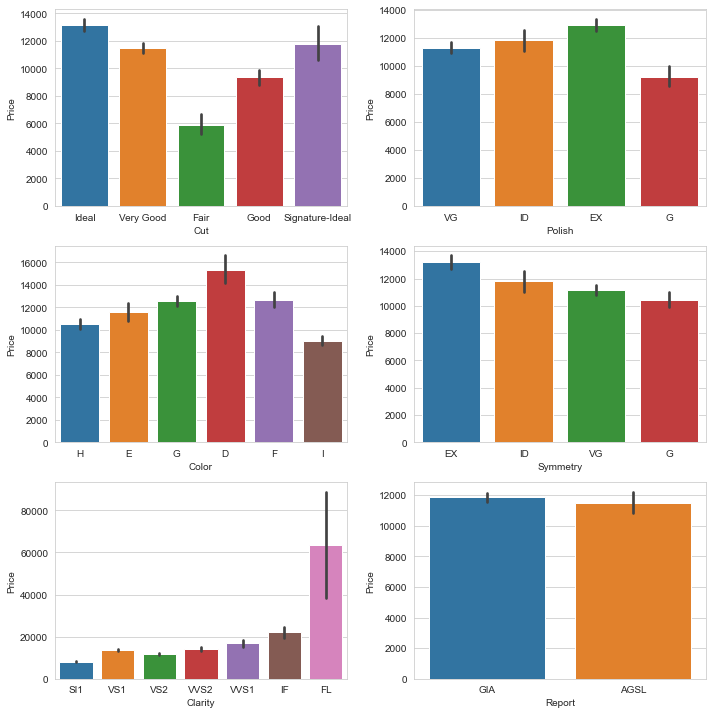

In [15]:
r = 3
c = 2

fig, axes = plt.subplots(r, c, figsize=(10,10))
for i, col in enumerate(diamonds.columns[1:-1]):
    ax_col = int(i%r)
    ax_row = int(i/r)
    
    sns.barplot(x = diamonds[col], y = diamonds['Price'], ax=axes[ax_col, ax_row])
fig.tight_layout()
plt.show()

##### As seen above the data of the report column does not have much of an influence on the price of the diamonds as compared to others

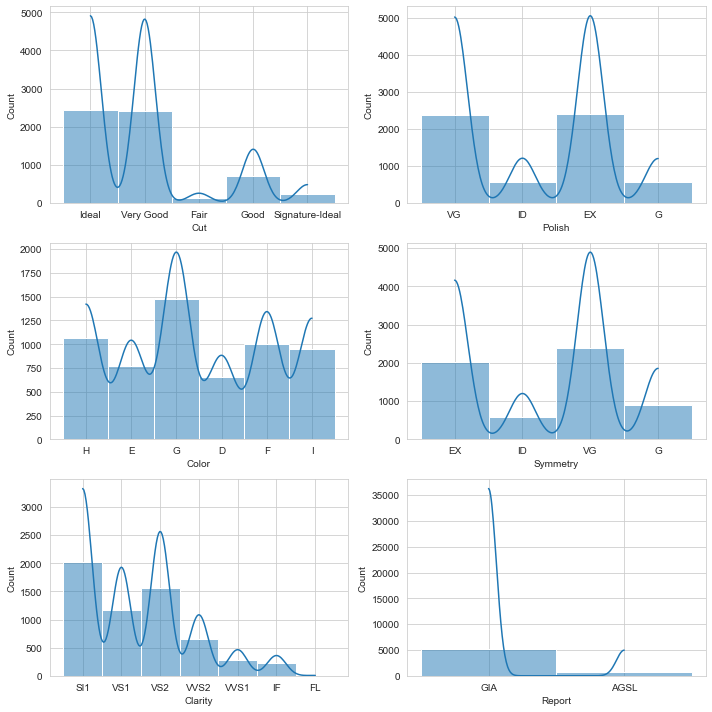

In [16]:
r = 3
c = 2

fig, axes = plt.subplots(r, c, figsize=(10,10))
for i, col in enumerate(diamonds.columns[1:-1]):
    ax_col = int(i%r)
    ax_row = int(i/r)
    
    sns.histplot(diamonds[col], ax=axes[ax_col, ax_row], kde = True)
fig.tight_layout()
plt.show()

In [17]:
# Transforming categorical data using lable encoder
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
encode = LabelEncoder()

# Transform the data
diamonds['Cut'] = encode.fit_transform(diamonds['Cut'])
diamonds['Color'] = encode.fit_transform(diamonds['Color'])
diamonds['Clarity'] = encode.fit_transform(diamonds['Clarity'])
diamonds['Polish'] = encode.fit_transform(diamonds['Polish'])
diamonds['Symmetry'] = encode.fit_transform(diamonds['Symmetry'])

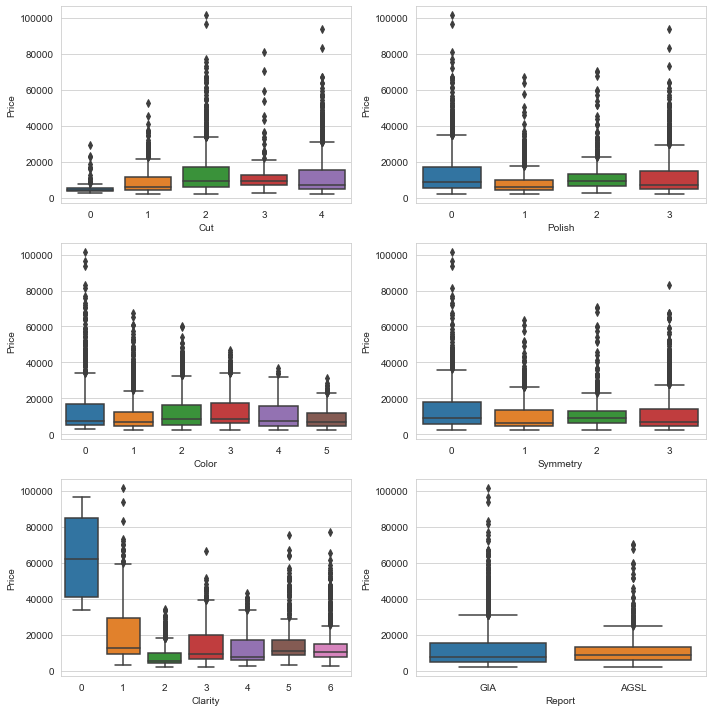

In [18]:
r = 3
c = 2

fig, axes = plt.subplots(r, c, figsize=(10,10))
for i, col in enumerate(diamonds.columns[1:-1]):
    ax_col = int(i%r)
    ax_row = int(i/r)
    
    sns.boxplot(x = diamonds[col], y = diamonds['Price'], ax=axes[ax_col, ax_row])
fig.tight_layout()
plt.show()

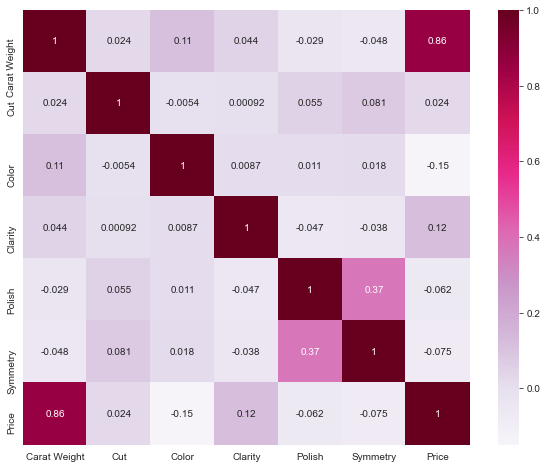

In [19]:
# Correlation diagra,m
plt.figure(figsize=(10,8))
g = sns.heatmap(diamonds.corr(), annot = True, cmap = 'PuRd')

### Data Transformation

In [20]:
def get_dummies(df, column_name):
    data = pd.get_dummies(df[column_name], prefix=column_name)
    get_column_names(data)
    return data

# Create dummies columns for Cut column
cut_dummies = get_dummies(diamonds, 'Cut')
diamonds_copy = pd.DataFrame(np.hstack([diamonds_copy, cut_dummies]), columns=features)

In [21]:
# Create dummies columns for Color column
color_dummies = get_dummies(diamonds, 'Color')
diamonds_copy = pd.DataFrame(np.hstack([diamonds_copy, color_dummies]), columns=features)

In [22]:
# Create dummies columns for Clarity column
clarity_dummies = get_dummies(diamonds, 'Clarity')
diamonds_copy = pd.DataFrame(np.hstack([diamonds_copy, clarity_dummies]), columns=features)

In [23]:
# Create dummies columns for Polish column
polish_dummies = get_dummies(diamonds, 'Polish')
diamonds_copy = pd.DataFrame(np.hstack([diamonds_copy, polish_dummies]), columns=features)

In [24]:
# Create dummies columns for Symmetry column
symmetry_dummies = get_dummies(diamonds, 'Symmetry')
diamonds_copy = pd.DataFrame(np.hstack([diamonds_copy, symmetry_dummies]), columns=features)

In [25]:
# Create dummies columns for Report column
report_dummies = get_dummies(diamonds, 'Report')
diamonds_copy = pd.DataFrame(np.hstack([diamonds_copy, report_dummies]), columns=features)

In [26]:
diamonds_copy.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Cut_0,Cut_1,...,Polish_0,Polish_1,Polish_2,Polish_3,Symmetry_0,Symmetry_1,Symmetry_2,Symmetry_3,Report_AGSL,Report_GIA
0,1.1,2,4,2,3,0,GIA,5169,0,0,...,0,0,0,1,1,0,0,0,0,1
1,0.83,2,4,3,2,2,AGSL,3470,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0.85,2,4,2,0,0,GIA,3183,0,0,...,1,0,0,0,1,0,0,0,0,1
3,0.91,2,1,2,3,3,GIA,4370,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0.83,2,3,2,0,0,GIA,3171,0,0,...,1,0,0,0,1,0,0,0,0,1


In [27]:
# Drop redundant columns
diamonds_copy = diamonds_copy.drop(['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report'], axis=1)

In [28]:
diamonds_copy.head()

,Carat Weight,Price,Cut_0,Cut_1,Cut_2,Cut_3,Cut_4,Color_0,Color_1,Color_2,...,Polish_0,Polish_1,Polish_2,Polish_3,Symmetry_0,Symmetry_1,Symmetry_2,Symmetry_3,Report_AGSL,Report_GIA
0,1.1,5169,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1,0.83,3470,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0.85,3183,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,0.91,4370,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
4,0.83,3171,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


### Split dataset into train and test set

In [29]:
# Selecting features and target data
#x = diamonds_copy.drop(['Price'], axis=1)
#y = diamonds_copy[['Price']]

x = diamonds.drop(['Price','Report'], axis=1)
y = diamonds[['Price']]

In [30]:
# Import librarues for train and test split
from sklearn.model_selection import train_test_split

# Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=101)

### Build ML models

The ML algorithms user are:
* Linear Regression
* Ridge Regression
* Lasso Regression
* KNN 
* Decision Tree

In [31]:
#Import libraries for the models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Linear Regression model

In [32]:
# Initialize the model
linear = LinearRegression(fit_intercept= True)

# Fit the model
linear.fit(X_train, Y_train)

# Predict values
linear_pred = linear.predict(X_test)

# Performance metrics
linear_metrics = ['Linear', 
                  np.round(mean_squared_error(Y_test, linear_pred),2), 
                  np.round(mean_absolute_error(Y_test, linear_pred), 2), 
                  np.round(mean_squared_error(Y_test, linear_pred, squared=False), 2), 
                  np.round(linear.score(X_test, Y_test), 2)]

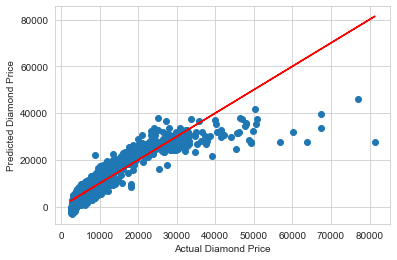

In [33]:
#Visualize the linear regression on testing dataset
plt.scatter(Y_test, linear_pred)
plt.plot(Y_test, Y_test, color = 'r')
plt.ylabel('Predicted Diamond Price')
plt.xlabel('Actual Diamond Price')
plt.show()

#### Ridge Regression model

In [34]:
# Initialize the model
ridge = Ridge()

# Fit the model
ridge.fit(X_train, Y_train)

# Predict the values
ridge_pred = ridge.predict(X_test)

# Performance metrics
ridge_metrics = ['Ridge', 
                 np.round(mean_squared_error(Y_test, ridge_pred),2), 
                 np.round(mean_absolute_error(Y_test, ridge_pred), 2), 
                 np.round(mean_squared_error(Y_test, ridge_pred, squared=False), 2), 
                np.round(ridge.score(X_test, Y_test), 2)]

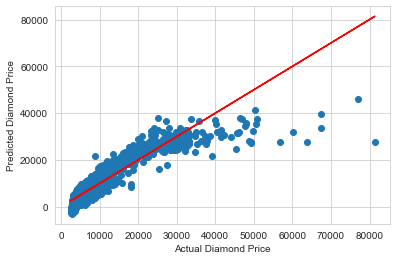

In [35]:
# Visualize the Ridge regression on testing dataset
plt.scatter(Y_test, ridge_pred)
plt.plot(Y_test, Y_test, color = 'r')
plt.ylabel('Predicted Diamond Price')
plt.xlabel('Actual Diamond Price')
plt.show()

#### Lasso regreesion model

In [36]:
# Initialize the model
lasso = Lasso()

# Fit the model
lasso.fit(X_train, Y_train)

# Predict the values
lasso_pred = lasso.predict(X_test)

# Performance metrics
lasso_metrics = ['Lasso', 
                 np.round(mean_squared_error(Y_test, lasso_pred),2), 
                 np.round(mean_absolute_error(Y_test, lasso_pred), 2), 
                 np.round(mean_squared_error(Y_test, lasso_pred, squared=False), 2), 
                 np.round(lasso.score(X_test, Y_test),2)]

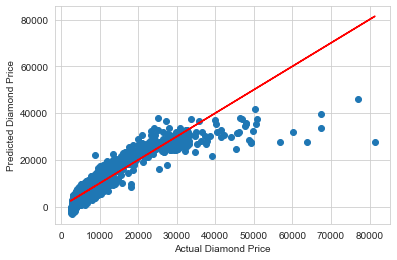

In [37]:
# Visualize the Lasso regression on testing dataset
plt.scatter(Y_test, lasso_pred)
plt.plot(Y_test, Y_test, color = 'r')
plt.ylabel('Predicted Diamond Price')
plt.xlabel('Actual Diamond Price')
plt.show()

#### K Nearest Neighbor

In [38]:
# Initialize the model.
knn = KNeighborsRegressor(n_neighbors=2)
    
# Fit the model
knn.fit(X_train, Y_train)
    
# Predict the values
knn_pred = knn.predict(X_test)


# Performance metrics
knn_metrics = ['KNN', 
                np.round(mean_squared_error(Y_test, knn_pred),2), 
                np.round(mean_absolute_error(Y_test, knn_pred), 2), 
                np.round(mean_squared_error(Y_test, knn_pred, squared=False), 2), 
                np.round(knn.score(X_test, Y_test),2)]

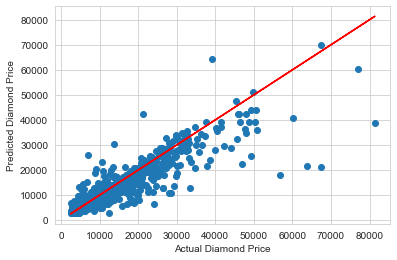

In [39]:
# Visualize the KNN regression on testing dataset
plt.scatter(Y_test, knn_pred)
plt.plot(Y_test, Y_test, color = 'r')
plt.ylabel('Predicted Diamond Price')
plt.xlabel('Actual Diamond Price')
plt.show()

#### Decision tree model

In [40]:
# Initialize the model.
dt = DecisionTreeRegressor()
    
# Fit the model
dt.fit(X_train, Y_train)
    
# Predict the values
dt_pred = dt.predict(X_test)


# Performance metrics
dt_metrics = ['Decision Tree', 
                np.round(mean_squared_error(Y_test, dt_pred),2), 
                np.round(mean_absolute_error(Y_test, dt_pred), 2), 
                np.round(mean_squared_error(Y_test, dt_pred, squared=False), 2), 
                np.round(dt.score(X_test, Y_test),2)]

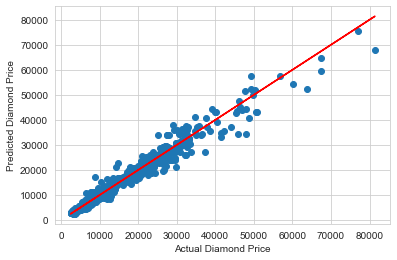

In [41]:
# Visualize the Decision tree regression on testing dataset
plt.scatter(Y_test, dt_pred)
plt.plot(Y_test, Y_test, color = 'r')
plt.ylabel('Predicted Diamond Price')
plt.xlabel('Actual Diamond Price')
plt.show()

#### Comparing performance metrix

In [42]:
metrics = pd.DataFrame([linear_metrics, ridge_metrics, lasso_metrics, knn_metrics, dt_metrics], 
                       columns=['Model', 'Mean square error', 'Mean Absolute Error', 'Mean Root Squared Error', 'Score'])

In [43]:
metrics

,Model,Mean square error,Mean Absolute Error,Mean Root Squared Error,Score
0,Linear,20157915.22,2741.39,4489.76,0.80
1,Ridge,20156301.63,2738.99,4489.58,0.80
2,Lasso,20157635.02,2740.63,4489.73,0.80
3,KNN,19072667.95,1959.12,4367.23,0.82
4,Decision Tree,3273417.14,968.83,1809.26,0.97


##### From the above comparision we can conclude that Decision tree is more efficient to predict the price of diamonds